<a href="https://colab.research.google.com/github/mastersithlord/CarBrandClassification/blob/main/car_logo_cnn_augm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip ./Images31May.zip

Archive:  ./Images31May.zip
   creating: ImagesToyotaNonToyota56/
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_AFTERMARKET_1_WS_10_03-11-18 14.56_AF LOGO_574726.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_AFTERMARKET_1_WS_7_23-02-21 16.31_Photos - After_632635.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_AFTERMARKET_1_WS_8_07-11-19 10.28_Photos - After_610494.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_AUDI_1_WS_6_15-11-18 13.04_Photos - After_575538.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_AUDI_1_WS_9_09-11-18 14.01_Photos - After_574994.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_BMW_1_WS_2_12-11-18 19.35_Photos - Before_575743.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_BMW_1_WS_7_08-12-17 14.04_Photos - After.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_BMW_1_WS_7_23-11-18 15.09_Photos - After_575743.JPG  
  inflating: ImagesToyotaNonToyota56/NONTOYOTA_1_CITROEN_1_WS_8_12-01-21 13.14_Photos - After_63

In [2]:
from PIL import Image
import os, sys

path = "/content/ImagesToyotaNonToyota56/"
dirs = os.listdir(path)

def resize():
  for item in dirs:
    if os.path.isfile(path+item):
      im=Image.open(path+item)
      #f, e = os.path.splitext(path+item)
      imResize = im.resize((480,480),Image.ANTIALIAS)
      imResize.save(path+item, 'JPEG', quality = 90)
resize()

In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./ImagesToyotaNonToyota56/"))

# Any results you write to the current directory are saved as output.

['NONTOYOTA_1_HYUNDAI_1_WS_6_30-11-17 12.20_Photos - After.JPG', 'TOYOTA_1_WS_8_03-12-18 14.00_Photos - After_577019.JPG', 'NONTOYOTA_1_HONDA_1_WS_5_06-11-17 16.56_Photos - Before.JPG', 'TOYOTA_1_WS_8_11-11-17 16.31_AF LOGO.JPG', 'TOYOTA_1_WS_9_19-11-18 13.59_Photos - After_576134.JPG', 'NONTOYOTA_1_MAZDA_1_WS_7_25-11-19 14.52_Photos - After_611993.JPG', 'NONTOYOTA_1_VOLKSWAGEN_1_WS_8_12-01-21 13.10_Photos - After_251590.JPG', 'NONTOYOTA_1_BMW_1_WS_7_23-11-18 15.09_Photos - After_575743.JPG', 'NONTOYOTA_1_BMW_1_WS_2_12-11-18 19.35_Photos - Before_575743.JPG', 'TOYOTA_1_WS_8_07-11-19 14.40_Photos - After_610076.JPG', 'TOYOTA_1_WS_10_01-12-17 11.55_Photos - After.JPG', 'TOYOTA_1_WS_11_01-12-17 11.55_Photos - After.JPG', 'NONTOYOTA_1_CITROEN_1_WS_8_12-01-21 13.14_Photos - After_632394.JPG', 'TOYOTA_1_WS_4_18-01-21 09.27_Photo (after) - Logo_632435.JPG', 'NONTOYOTA_1_HONDA_1_WS_1_28-12-20 12.50_Photos - Before_251331.JPG', 'TOYOTA_1_WS_10_14-12-18 12.18_Photos - After_578734.JPG', 'TOYOTA_

In [5]:
import os
import numpy as np

# Importing scikit-learn tools
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Importing standard ML set - numpy, pandas, matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Importing keras and its deep learning tools - neural network model, layers, contraints, optimizers, callbacks and utilities
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import Adam, RMSprop
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import np_utils
from keras.regularizers import l2
from keras.initializers import RandomNormal, VarianceScaling



In [6]:
image_path = './ImagesToyotaNonToyota56/'
imgs = os.listdir(image_path)
img_x = img_y = 480 # image size is constant
n_samples = np.size(imgs)
n_samples # 20778 originally


56

In [7]:
from PIL import Image
# loading all images
images = np.array([ np.array( Image.open(image_path+img).convert("RGB") ).flatten() for img in imgs], order='F')
# Mỗi ảnh có kích thước 50x50 = 2500 pixel và 3 kênh màu = 7500 pixel
print('total images: ', np.shape(images) )


total images:  (56, 691200)


In [8]:
# Producing label and assigning them accordingly
import re
# Use below if car brands are plenty
#cars = ['AGCAUTOMOTIVE_', 'AUDI_', 'BMW_', 'CITROEN_', 'HONDA_', 'HYUNDAI_', 'KIA_', 'LAMIPANE_',
#        'MAZDA_', 'MERCEDES-BENZ_', 'NISSAN_', 'SAINTGOBAIN_', 'SUBARU_',  'TOYOTA_', 'VOLKSWAGEN_', 'XYG_']

# For Toyota vs NonToyota
cars = ['TOYOTA_','NONTOYOTA_']

# re.match()[0] lấy về tên car , car.index trả về index ứng với tên car vd: Daewoo index là 6 (cars[6] = 'Daewoo')
labels = np.array([ cars.index(re.match(r"(^\D+)", imgs[i])[0]) for i in range(n_samples)])
print('total label images: ', labels.shape )
labels_pd = pd.DataFrame(labels)
labels_pd[0].value_counts()

total label images:  (56,)


1    28
0    28
Name: 0, dtype: int64

In [9]:
# preparation data
dataset, labelset = shuffle(images, labels, random_state=42)
train_data = [dataset, labelset]


In [10]:
test = images[1]
test.reshape(480,480,3)

array([[[166, 158, 155],
        [163, 158, 154],
        [162, 157, 153],
        ...,
        [ 44,  44,  44],
        [ 43,  43,  43],
        [ 43,  43,  43]],

       [[167, 159, 156],
        [163, 158, 154],
        [163, 158, 154],
        ...,
        [ 44,  44,  44],
        [ 43,  43,  43],
        [ 43,  43,  43]],

       [[167, 159, 156],
        [164, 159, 155],
        [163, 158, 154],
        ...,
        [ 44,  44,  44],
        [ 43,  43,  43],
        [ 43,  43,  43]],

       ...,

       [[164, 147, 129],
        [125, 108,  90],
        [ 90,  73,  55],
        ...,
        [131, 113, 109],
        [130, 112, 108],
        [126, 111, 106]],

       [[161, 144, 126],
        [121, 104,  86],
        [ 89,  72,  54],
        ...,
        [129, 111, 107],
        [127, 112, 107],
        [127, 112, 107]],

       [[159, 142, 124],
        [117, 100,  82],
        [ 89,  72,  54],
        ...,
        [128, 110, 106],
        [127, 112, 107],
        [128, 113, 108]]

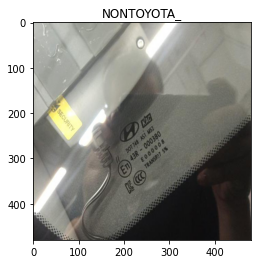

In [12]:
# an example image
r=40
plt.imshow(images[r].reshape(img_x,img_y,3))
plt.title(cars[labels[r]])
plt.show()


In [13]:
# Training and preparing dataset\n",
X_train, X_test, y_train, y_test = train_test_split( train_data[0], train_data[1], test_size=0.2)
# Maintain a copy of testset\n",
X_test_img = X_test.copy()

In [14]:
# bring images back size (20778, 50, 50,3)
def ImageConvert(n, i):
    im_ex = i.reshape(n, img_x, img_y,3)
    im_ex = im_ex.astype('float32') / 255
    # zero center data
    im_ex = np.subtract(im_ex, 0.5)
    # ...and to scale it to (-1, 1)
    im_ex = np.multiply(im_ex, 2.0)
    return im_ex
X_train = ImageConvert(X_train.shape[0], X_train)
X_test = ImageConvert(X_test.shape[0], X_test)

In [15]:
# Labels have to be transformed to categorical
Y_train = np_utils.to_categorical(y_train, num_classes=len(cars))
Y_test = np_utils.to_categorical(y_test, num_classes=len(cars))


**Deeplearning ResNet50**

In [16]:
from keras.applications.resnet import ResNet50, preprocess_input

HEIGHT = 480
WIDTH = 480
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                    input_shape=(HEIGHT, WIDTH, 3))

94781440/94765736 [==============================] - 0s 0us/step


**Data generator **

In [17]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #preprocessing_function=preprocess_input,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True)

#training the image preprocessing
image_gen.fit(X_train)

In [18]:
def build_finetune_model(base_model, dropout, fc_layers, num_classes):
#     for layer in base_model.layers[:13]:
#         layer.trainable = False
        
    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        # New FC layer, random init
        x = Dense(fc, activation='relu')(x) 
        x = Dropout(dropout)(x)

    # New softmax layer
    predictions = Dense(num_classes, activation='softmax')(x) 
    
    finetune_model = Model(inputs=base_model.input, outputs=predictions)

    return finetune_model


FC_LAYERS = [1024, 1024]
dropout = 0.5

finetune_model = build_finetune_model(base_model, 
                                      dropout=dropout, 
                                      fc_layers=FC_LAYERS, 
                                        num_classes=len(cars))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
14/14 [==============================] - 19s 550ms/step - loss: 5.4796 - categorical_accuracy: 0.6653 - val_loss: 814.2613 - val_categorical_accuracy: 0.5833


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 2/200
14/14 [==============================] - 4s 279ms/step - loss: 2.4040 - categorical_accuracy: 0.6263 - val_loss: 71.5276 - val_categorical_accuracy: 0.6667


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 3/200
14/14 [==============================] - 4s 275ms/step - loss: 4.2378 - categorical_accuracy: 0.5744 - val_loss: 52.7457 - val_categorical_accuracy: 0.5833


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 4/200
14/14 [==============================] - 4s 274ms/step - loss: 1.7943 - categorical_accuracy: 0.8128 - val_loss: 243.5959 - val_categorical_accuracy: 0.4167
Epoch 5/200
14/14 [==============================] - 4s 276ms/step - loss: 1.4621 - categorical_accuracy: 0.7451 - val_loss: 174.9583 - val_categorical_accuracy: 0.4167
Epoch 6/200
14/14 [==============================] - 4s 276ms/step - loss: 2.0015 - categorical_accuracy: 0.6997 - val_loss: 68.6575 - val_categorical_accuracy: 0.5000
Epoch 7/200
14/14 [==============================] - 4s 277ms/step - loss: 4.5980 - categorical_accuracy: 0.5024 - val_loss: 46.8473 - val_categorical_accuracy: 0.5833


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 8/200
14/14 [==============================] - 4s 277ms/step - loss: 0.8612 - categorical_accuracy: 0.7645 - val_loss: 12.2891 - val_categorical_accuracy: 0.8333


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 9/200
14/14 [==============================] - 4s 276ms/step - loss: 0.8117 - categorical_accuracy: 0.8258 - val_loss: 11.9733 - val_categorical_accuracy: 0.6667


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 10/200
14/14 [==============================] - 4s 275ms/step - loss: 1.6986 - categorical_accuracy: 0.6773 - val_loss: 15.1509 - val_categorical_accuracy: 0.3333
Epoch 11/200
14/14 [==============================] - 4s 281ms/step - loss: 0.5399 - categorical_accuracy: 0.8299 - val_loss: 20.8718 - val_categorical_accuracy: 0.3333
Epoch 12/200
14/14 [==============================] - 4s 287ms/step - loss: 1.0466 - categorical_accuracy: 0.9049 - val_loss: 23.8744 - val_categorical_accuracy: 0.4167
Epoch 13/200
14/14 [==============================] - 4s 280ms/step - loss: 0.9736 - categorical_accuracy: 0.6850 - val_loss: 8.6603 - val_categorical_accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 14/200
14/14 [==============================] - 4s 277ms/step - loss: 0.1908 - categorical_accuracy: 0.9673 - val_loss: 3.8188 - val_categorical_accuracy: 0.4167


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 15/200
14/14 [==============================] - 4s 275ms/step - loss: 0.6556 - categorical_accuracy: 0.8392 - val_loss: 51.7270 - val_categorical_accuracy: 0.4167
Epoch 16/200
14/14 [==============================] - 4s 277ms/step - loss: 0.8776 - categorical_accuracy: 0.9088 - val_loss: 23.4795 - val_categorical_accuracy: 0.4167
Epoch 17/200
14/14 [==============================] - 4s 279ms/step - loss: 0.6821 - categorical_accuracy: 0.8165 - val_loss: 18.3010 - val_categorical_accuracy: 0.4167
Epoch 18/200
14/14 [==============================] - 4s 280ms/step - loss: 0.1389 - categorical_accuracy: 0.9557 - val_loss: 12.6914 - val_categorical_accuracy: 0.4167
Epoch 19/200
14/14 [==============================] - 4s 281ms/step - loss: 0.6733 - categorical_accuracy: 0.8951 - val_loss: 1.2647 - val_categorical_accuracy: 0.7500


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 20/200
14/14 [==============================] - 4s 276ms/step - loss: 0.3332 - categorical_accuracy: 0.9849 - val_loss: 1.0287 - val_categorical_accuracy: 0.7500


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 21/200
14/14 [==============================] - 4s 276ms/step - loss: 0.4389 - categorical_accuracy: 0.9334 - val_loss: 4.7447 - val_categorical_accuracy: 0.4167
Epoch 22/200
14/14 [==============================] - 4s 279ms/step - loss: 1.2681 - categorical_accuracy: 0.8206 - val_loss: 14.1373 - val_categorical_accuracy: 0.4167
Epoch 23/200
14/14 [==============================] - 4s 289ms/step - loss: 0.5769 - categorical_accuracy: 0.8610 - val_loss: 3.2622 - val_categorical_accuracy: 0.3333
Epoch 24/200
14/14 [==============================] - 4s 282ms/step - loss: 0.6271 - categorical_accuracy: 0.8631 - val_loss: 0.8103 - val_categorical_accuracy: 0.5000


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 25/200
14/14 [==============================] - 4s 278ms/step - loss: 0.3726 - categorical_accuracy: 0.8709 - val_loss: 0.5471 - val_categorical_accuracy: 0.8333


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 26/200
14/14 [==============================] - 4s 278ms/step - loss: 0.5636 - categorical_accuracy: 0.9111 - val_loss: 0.6747 - val_categorical_accuracy: 0.5833
Epoch 27/200
14/14 [==============================] - 4s 288ms/step - loss: 0.6246 - categorical_accuracy: 0.8126 - val_loss: 1.4853 - val_categorical_accuracy: 0.4167
Epoch 28/200
14/14 [==============================] - 4s 281ms/step - loss: 0.4355 - categorical_accuracy: 0.8736 - val_loss: 1.0157 - val_categorical_accuracy: 0.5000
Epoch 29/200
14/14 [==============================] - 4s 291ms/step - loss: 1.5401 - categorical_accuracy: 0.8565 - val_loss: 0.3524 - val_categorical_accuracy: 0.8333


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 30/200
14/14 [==============================] - 4s 276ms/step - loss: 0.3769 - categorical_accuracy: 0.8971 - val_loss: 1.7239 - val_categorical_accuracy: 0.7500
Epoch 31/200
14/14 [==============================] - 4s 277ms/step - loss: 0.5570 - categorical_accuracy: 0.8802 - val_loss: 2.9203 - val_categorical_accuracy: 0.7500
Epoch 32/200
14/14 [==============================] - 4s 277ms/step - loss: 1.0456 - categorical_accuracy: 0.9618 - val_loss: 1.0808 - val_categorical_accuracy: 0.6667
Epoch 33/200
14/14 [==============================] - 4s 280ms/step - loss: 0.5124 - categorical_accuracy: 0.8331 - val_loss: 1.2121 - val_categorical_accuracy: 0.5833
Epoch 34/200
14/14 [==============================] - 4s 282ms/step - loss: 0.3666 - categorical_accuracy: 0.9412 - val_loss: 2.4026 - val_categorical_accuracy: 0.4167
Epoch 35/200
14/14 [==============================] - 4s 282ms/step - loss: 0.1739 - categorical_

(0.0, 1.0)

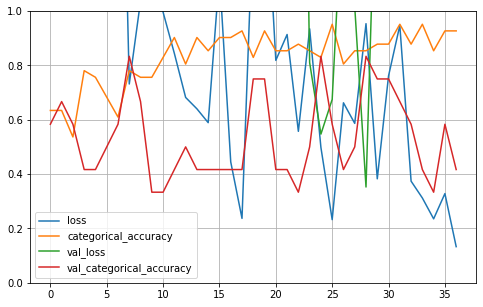

In [40]:
NUM_EPOCHS = 200
BATCH_SIZE = 3


adam1 = Adam(lr=0.0001)
sgd = SGD(lr=0.0005, decay=1e-6, momentum=0.95, nesterov=True)
finetune_model.compile(adam1, loss='categorical_crossentropy', metrics=['categorical_accuracy'])


# Some callbacks have to be provided to choose the best trained model
# patience set at 4 as 3 was too greedy - I observed better results after the third-worse epoch
early_stopping = EarlyStopping(patience=8, monitor='val_loss')
ResNet_file = 'car_ResNet_AUGM.h5py' # the 13th try, with augmented data
take_best_model = ModelCheckpoint(ResNet_file, save_best_only=True)


filepath="ResNet50" + "_model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["categorical_accuracy"], verbose=1, mode='max')

callbacks_list = [take_best_model,early_stopping]


callbacks_list = [early_stopping, take_best_model]

fitted_model = finetune_model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                                          steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                                          epochs=NUM_EPOCHS,
                                          shuffle=True,
                                          verbose=1,
                                          validation_data=(X_test, Y_test),
                                          callbacks=callbacks_list)

pd.DataFrame(fitted_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]


**ResNet50 with finetune**

In [41]:

from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
# %tensorflow_version 1.x


# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = Dense(1024, activation='relu')(x)
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(len(cars), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional ResNet layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

NUM_EPOCHS = 200
BATCH_SIZE = 3
# train the model on the new data for a few epochs
model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                                  steps_per_epoch=len(X_train)//BATCH_SIZE,
                                  epochs=NUM_EPOCHS)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
14/14 [==============================] - 10s 137ms/step - loss: 9.8524 - categorical_accuracy: 0.4220
Epoch 2/200
14/14 [==============================] - 2s 141ms/step - loss: 1.0748 - categorical_accuracy: 0.4706
Epoch 3/200
14/14 [==============================] - 2s 135ms/step - loss: 0.9927 - categorical_accuracy: 0.5265
Epoch 4/200
14/14 [==============================] - 2s 134ms/step - loss: 0.9180 - categorical_accuracy: 0.5712
Epoch 5/200
14/14 [==============================] - 2s 136ms/step - loss: 0.7807 - categorical_accuracy: 0.4832
Epoch 6/200
14/14 [==============================] - 2s 135ms/step - loss: 0.6837 - categorical_accuracy: 0.5436
Epoch 7/200
14/14 [==============================] - 2s 136ms/step - loss: 0.9239 - categorical_accuracy: 0.4508
Epoch 8/200
14/14 [==============================] - 2s 137ms/step - loss: 0.8087 - categorical_accuracy: 0.3821
Epoch 9/200
14/14 [==============================] - 2s 137ms/step - loss: 0.7317 - categorical

In [42]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_3
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [43]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from ResNet. We will freeze the bottom N layers
# and train the remaining top layers.

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
# for layer in model.layers[:249]:
#    layer.trainable = False
# for layer in model.layers[249:]:
#    layer.trainable = True
for layer in model.layers:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Some callbacks have to be provided to choose the best trained model
# patience set at 4 as 3 was too greedy - I observed better results after the third-worse epoch
early_stopping = EarlyStopping(patience=8, monitor='val_loss')
InceptionV3_file = 'car_ResNet_AUGM.h5py' # the 13th try, with augmented data
take_best_model = ModelCheckpoint(InceptionV3_file, save_best_only=True)
callbacks_list = [take_best_model,early_stopping]

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
NUM_EPOCHS = 200
fitted_model2 = model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                                      steps_per_epoch=len(X_train)//BATCH_SIZE,
                                      epochs=NUM_EPOCHS,
                                      verbose=1,
                                      validation_data=(X_test, Y_test),
                                      callbacks=callbacks_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
14/14 [==============================] - 18s 558ms/step - loss: 20.8450 - categorical_accuracy: 0.5163 - val_loss: 9.3770 - val_categorical_accuracy: 0.4167


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 2/200
14/14 [==============================] - 3s 197ms/step - loss: 23.1832 - categorical_accuracy: 0.6366 - val_loss: 109.4801 - val_categorical_accuracy: 0.5833
Epoch 3/200
14/14 [==============================] - 3s 199ms/step - loss: 24.1354 - categorical_accuracy: 0.7313 - val_loss: 157.5668 - val_categorical_accuracy: 0.5833
Epoch 4/200
14/14 [==============================] - 3s 201ms/step - loss: 30.8492 - categorical_accuracy: 0.5024 - val_loss: 59.7198 - val_categorical_accuracy: 0.4167
Epoch 5/200
14/14 [==============================] - 3s 201ms/step - loss: 8.7358 - categorical_accuracy: 0.6033 - val_loss: 2.9173 - val_categorical_accuracy: 0.4167


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: car_ResNet_AUGM.h5py/assets
Epoch 6/200
14/14 [==============================] - 3s 196ms/step - loss: 15.8960 - categorical_accuracy: 0.4476 - val_loss: 12.8440 - val_categorical_accuracy: 0.5833
Epoch 7/200
14/14 [==============================] - 3s 196ms/step - loss: 4.8995 - categorical_accuracy: 0.6767 - val_loss: 4.7246 - val_categorical_accuracy: 0.5833
Epoch 8/200
14/14 [==============================] - 3s 195ms/step - loss: 2.8297 - categorical_accuracy: 0.6711 - val_loss: 12.5713 - val_categorical_accuracy: 0.5833
Epoch 9/200
14/14 [==============================] - 3s 194ms/step - loss: 2.8376 - categorical_accuracy: 0.6965 - val_loss: 8.9996 - val_categorical_accuracy: 0.5833
Epoch 10/200
14/14 [==============================] - 3s 193ms/step - loss: 3.7498 - categorical_accuracy: 0.7264 - val_loss: 3.1082 - val_categorical_accuracy: 0.5833
Epoch 11/200
14/14 [==============================] - 3s 197ms/step - loss: 4.4354 - categorical_a

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


1/1 [==============================] - 0s 212ms/step - loss: 5.9752 - categorical_accuracy: 0.4167
Accuracy test: 41.67%


(0.0, 2.0)

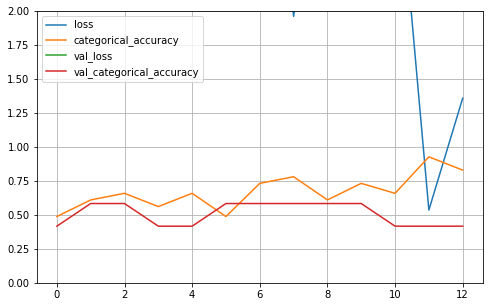

In [44]:
# Save the weights
model.save_weights('car_ResNet_AUGM_weights.h5')

# Save the model architecture
with open('model_car_ResNet_AUGM.json', 'w') as f:
    f.write(model.to_json())

#print("Saved model to disk")
scores = model.evaluate(X_test, Y_test) # let's look at the accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))

pd.DataFrame(fitted_model2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]


In [45]:
from sklearn.metrics import precision_recall_fscore_support as prfs
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred,axis=1)

precision, recall, f1, support = prfs(y_test, Y_pred, average='weighted')
print("Precision: {:.2%}\nRecall: {:.2%}\nF1 score: {:.2%}\nAccuracy: {:.2%}".format(precision, recall, f1, scores[1]))

Precision: 17.36%
Recall: 41.67%
F1 score: 24.51%
Accuracy: 41.67%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Some new image

In [23]:
!unzip ImagesTest.zip

Archive:  ImagesTest.zip
   creating: ImagesTest/
  inflating: ImagesTest/TOYOTA_1_WS_6_10-11-17 20.44_Accident Photo.JPG  
  inflating: ImagesTest/TOYOTA_1_WS_6_28-11-19 14.23_After Repair Photo_612352.JPG  
  inflating: ImagesTest/TOYOTA_1_WS_8_07-11-19 14.40_Photos - After_610076.JPG  
  inflating: ImagesTest/TOYOTA_1_WS_8_08-12-17 14.13_Photos - After.JPG  
  inflating: ImagesTest/TOYOTA_1_WS_9_12-01-21 17.51_AFTER PHOTO_251532.JPG  


In [46]:
new_image_path = './ImagesToyotaNonToyotaTest4/'
new_imgs = os.listdir(new_image_path)
new_n_samples = np.size(new_imgs)
new_n_samples # 8

4

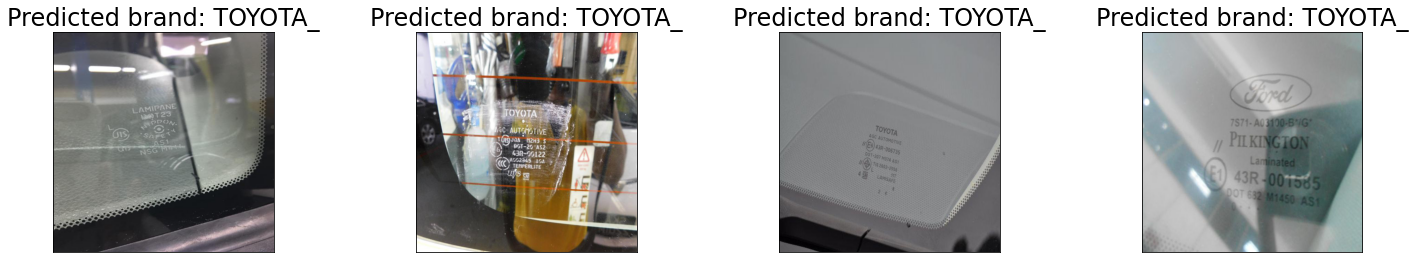

In [47]:
cols = 6
rows = 2
plt.figure(figsize=(cols * 5, rows * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(new_n_samples):
    plt.subplot(rows, cols, i + 1)
    im = Image.open(new_image_path+new_imgs[i]).convert("RGB")
    new_im = np.array(im.resize((480,480))).flatten()
    m = int(np.argmax(model.predict(ImageConvert(1, new_im), verbose=0),axis=1))
    plt.imshow(new_im.reshape(img_x, img_y, 3))
    plt.title('Predicted brand: ' +cars[m], size=24)
    plt.xticks(())
    plt.yticks(())
plt.show() 

***

In [48]:
# Four Conv/MaxPool blocks, a flattening layer and two dense layers at the end
def contruction(n_channels):
    model = Sequential()
    model.add(Conv2D(32, (3,3),
                     input_shape=(img_x,img_y,n_channels),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64, (3,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, (3,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(256, (3,3),
                     padding='valid',
                     bias_initializer='glorot_uniform',
                     kernel_regularizer=l2(0.00004),
                     kernel_initializer=VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())

    # model.add(Dense(4096, activation='relu', bias_initializer='glorot_uniform'))
    model.add(Dense(1024, activation='relu', bias_initializer='glorot_uniform'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1024, activation='relu', bias_initializer='glorot_uniform'))
    model.add(Dropout(0.5))
    
    # final activation is softmax, tuned to the number of classes/labels possible
    model.add(Dense(len(cars), activation='softmax'))
    
    
    
    # optimizer will be a stochastic gradient descent, learning rate set at 0.005
    sgd = SGD(lr=0.005, decay=1e-6, momentum=0.95, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])
    return model
model = contruction(3)

# Let's look at the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 478, 478, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 239, 239, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 237, 237, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 118, 118, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 116, 116, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 58, 58, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 256)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [49]:
from keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    vertical_flip=True)

#training the image preprocessing
image_gen.fit(X_train, augment=True)


In [50]:
# Some callbacks have to be provided to choose the best trained model
# patience set at 4 as 3 was too greedy - I observed better results after the third-worse epoch
early_stopping = EarlyStopping(patience=7, monitor='val_loss')
CNN_file = 'car_CNN_9AUGM_CMCMCMCMF.h5py' # the 13th try, with augmented data
take_best_model = ModelCheckpoint(CNN_file, save_best_only=True)

**Data augumentation**

**Train after augumentation **

In [51]:
NUM_EPOCHS = 200
BATCH_SIZE = 3


# monitor the validation accuracy, reduce the learning rate by factor when there is no improvement after the number of patience 
reduce_lr = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                              factor=0.3, 
                              patience=9, 
                              min_lr=0.00001)

callbacks_list = [reduce_lr, early_stopping, take_best_model]

history = model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
                              steps_per_epoch=X_train.shape[0]//BATCH_SIZE,
                              epochs=NUM_EPOCHS,
                              verbose=1,
                              validation_data=(X_test, Y_test),
                              callbacks=callbacks_list)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
14/14 [==============================] - 4s 187ms/step - loss: nan - categorical_accuracy: 0.5913 - val_loss: nan - val_categorical_accuracy: 0.4167
Epoch 2/200
14/14 [==============================] - 2s 143ms/step - loss: nan - categorical_accuracy: 0.5913 - val_loss: nan - val_categorical_accuracy: 0.4167
Epoch 3/200
14/14 [==============================] - 2s 141ms/step - loss: nan - categorical_accuracy: 0.4642 - val_loss: nan - val_categorical_accuracy: 0.4167
Epoch 4/200
14/14 [==============================] - 2s 143ms/step - loss: nan - categorical_accuracy: 0.6177 - val_loss: nan - val_categorical_accuracy: 0.4167
Epoch 5/200
14/14 [==============================] - 2s 144ms/step - loss: nan - categorical_accuracy: 0.5378 - val_loss: nan - val_categorical_accuracy: 0.4167
Epoch 6/200
14/14 [==============================] - 2s 142ms/step - loss: nan - categorical_accuracy: 0.6290 - val_loss: nan - val_categorical_accuracy: 0.4167
Epoch 7/200
14/14 [===============

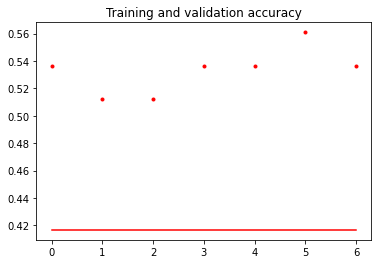

1/1 [==============================] - 0s 70ms/step - loss: nan - categorical_accuracy: 0.4167
Accuracy test: 41.67%


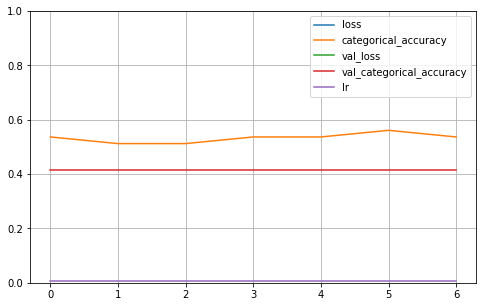

In [52]:
model.save_weights("car_CNN_AUGM_CMCMCMCMF.h5")
# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    # plt.figure()
    # plt.plot(epochs, loss, 'r.')
    # plt.plot(epochs, val_loss, 'r-')
    # plt.title('Training and validation loss')
    plt.show()
    
plot_training(history)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

#print("Saved model to disk")
scores = model.evaluate(X_test, Y_test) # let's look at the accuracy on the test set
print("Accuracy test: %.2f%%" % (scores[1]*100))

**Metrics of success**


In [53]:
from sklearn.metrics import precision_recall_fscore_support as prfs

# Preparing for metrics check-up on the test set, may take a while...
Y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [54]:
precision, recall, f1, support = prfs(y_test, Y_pred, average='weighted')
print("Precision: {:.2%}\nRecall: {:.2%}\nF1 score: {:.2%}\nAccuracy: {:.2%}".format(precision, recall, f1, scores[1]))

Precision: 17.36%
Recall: 41.67%
F1 score: 24.51%
Accuracy: 41.67%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Report
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

Accuracy : 0.4166666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


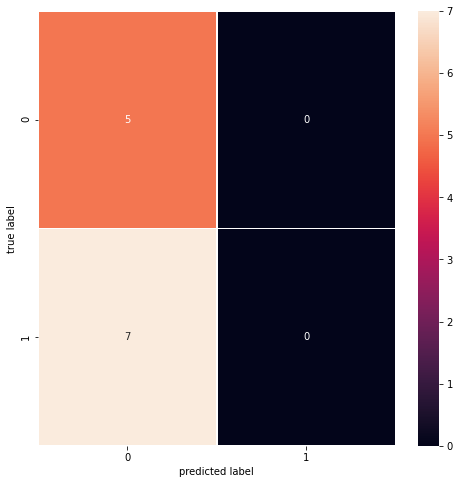

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns #for better and easier plots

def report_and_confusion_matrix(label, prediction):
    print("Model Report")
    print(classification_report(label, prediction))
    score = accuracy_score(label, prediction)
    print("Accuracy : "+ str(score))
    
    ####################
    fig, ax = plt.subplots(figsize=(8,8)) #setting the figure size and ax
    mtx = confusion_matrix(label, prediction)
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=True, ax=ax) #create a heatmap with the values of our confusion matrix
    plt.ylabel('true label')
    plt.xlabel('predicted label')

report_and_confusion_matrix(y_test, Y_pred)

In [56]:
# But let's check per class, too - assuming that larger datasets will be having higher metrics
precision_, recall_, f1_, support_ = prfs(y_test, Y_pred, average=None)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


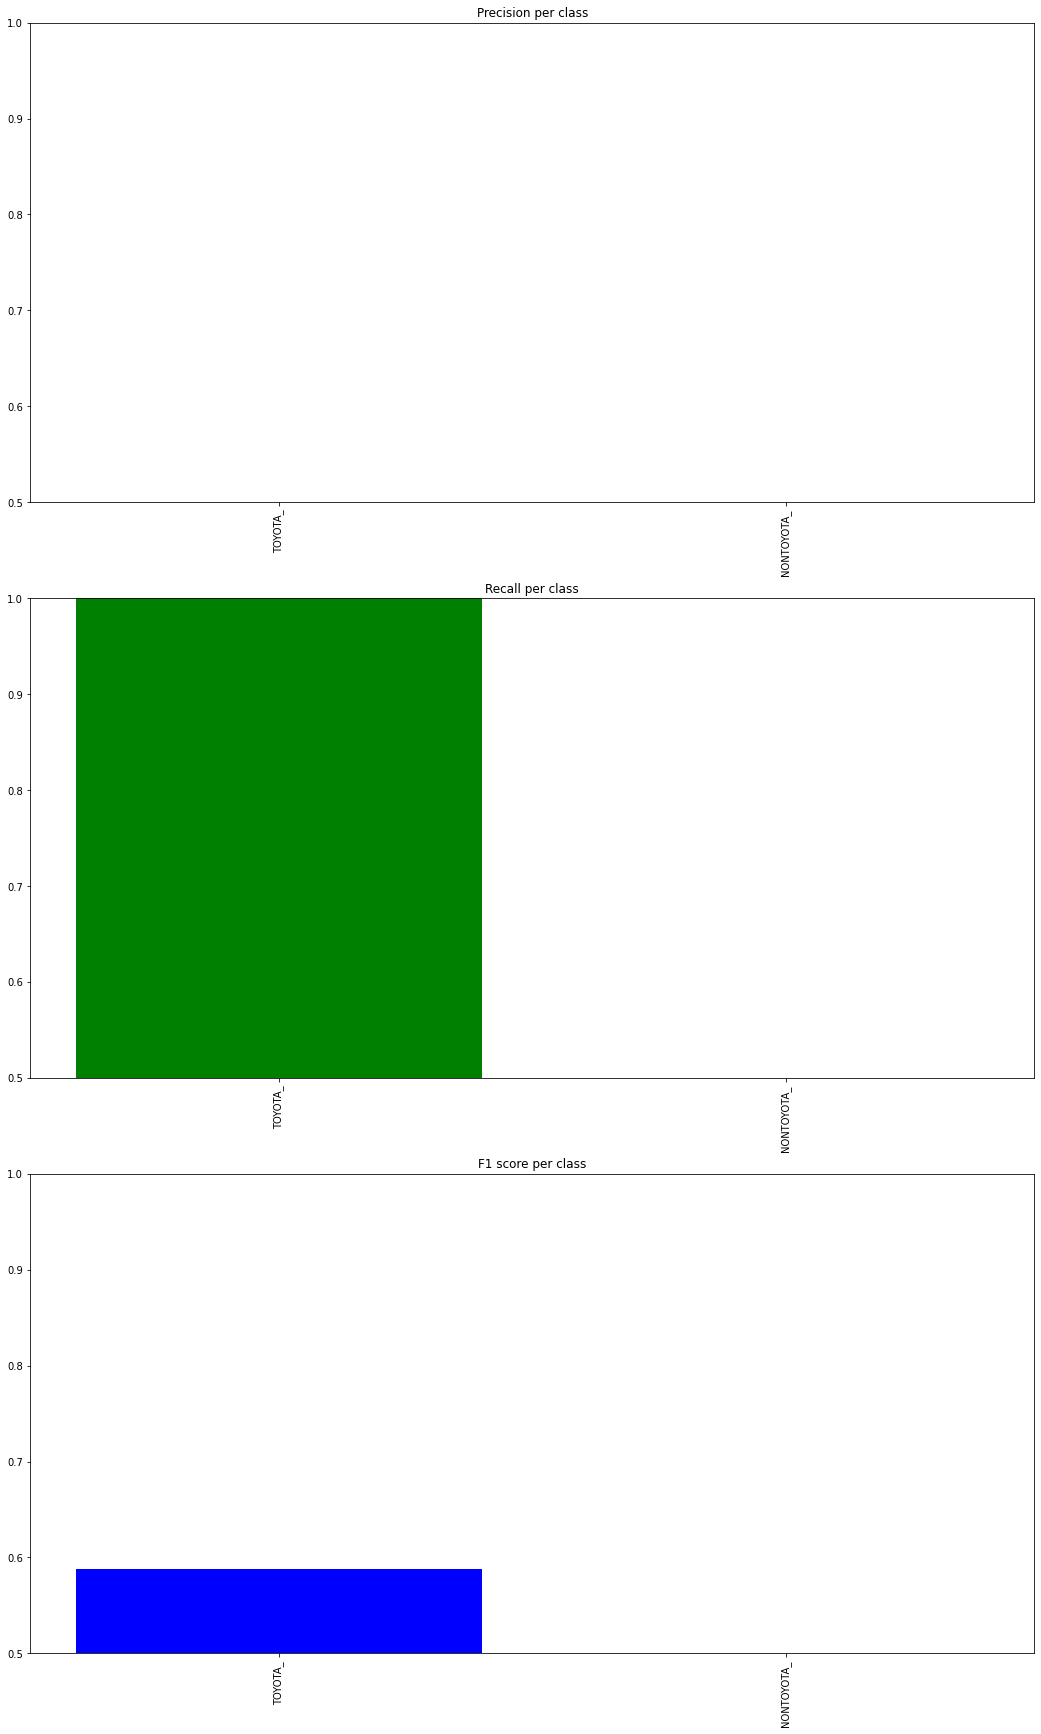

In [57]:
# We see that smaller sets (Lexus, Jaguar, Hyundai) have generally worse precision and recall
plt.subplots(figsize=(18,30))
x = range(len(cars))
plt.subplot(311)
plt.title('Precision per class')
plt.ylim(0.5, 1.00)
plt.bar(x, precision_, color='Red')
plt.xticks(x, cars, rotation = 90)
plt.subplot(312)
plt.title('Recall per class')
plt.ylim(0.5, 1.00)
plt.bar(x, recall_, color='Green')
plt.xticks(x, cars, rotation = 90)
plt.subplot(313)
plt.title('F1 score per class')
plt.ylim(0.5, 1.00)
plt.bar(x, f1_, color='Blue')
plt.xticks(x, cars, rotation = 90)
plt.show()

In [58]:
# OK, let's try the CNN in action - first defining the ShowCase() method to show everything nicely

def ShowCase(cols, rows):
    fdict = {'fontsize': 24,
            'fontweight' : 'normal',
            'verticalalignment': 'baseline'}
    plt.figure(figsize=(cols * 5, rows * 4))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    c = 0
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        
        # r - randomly picked from the whole dataset
        r = np.random.randint(np.shape(images)[0])
        
        # j - predicted class for the image of index r (weird syntax, but works :)
        j = int(model.predict_classes(ImageConvert(1, images[r:r+1]), verbose=0))
        
        # increase success if predicted well
        if labels[r] == j:
            c += 1
        
        # image needs reshaping back to a 50px*50px*RGB
        plt.imshow(images[r].reshape(img_x, img_y, 3))
        
        # plt.title will show the true brand and the predicted brand
        plt.title('True brand: '+cars[labels[r]]+'\nPredicted: '+cars[j],
                  color= 'Green' if cars[labels[r]] == cars[j] else 'Red', fontdict=fdict) # Green for right, Red for wrong
        
        # no ticks
        plt.xticks(())
        plt.yticks(())
        
    # print out the success rate
    print('Success rate: {}/{} ({:.2%})'.format(c, rows*cols, c/(rows*cols)))
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Success rate: 51/100 (51.00%)


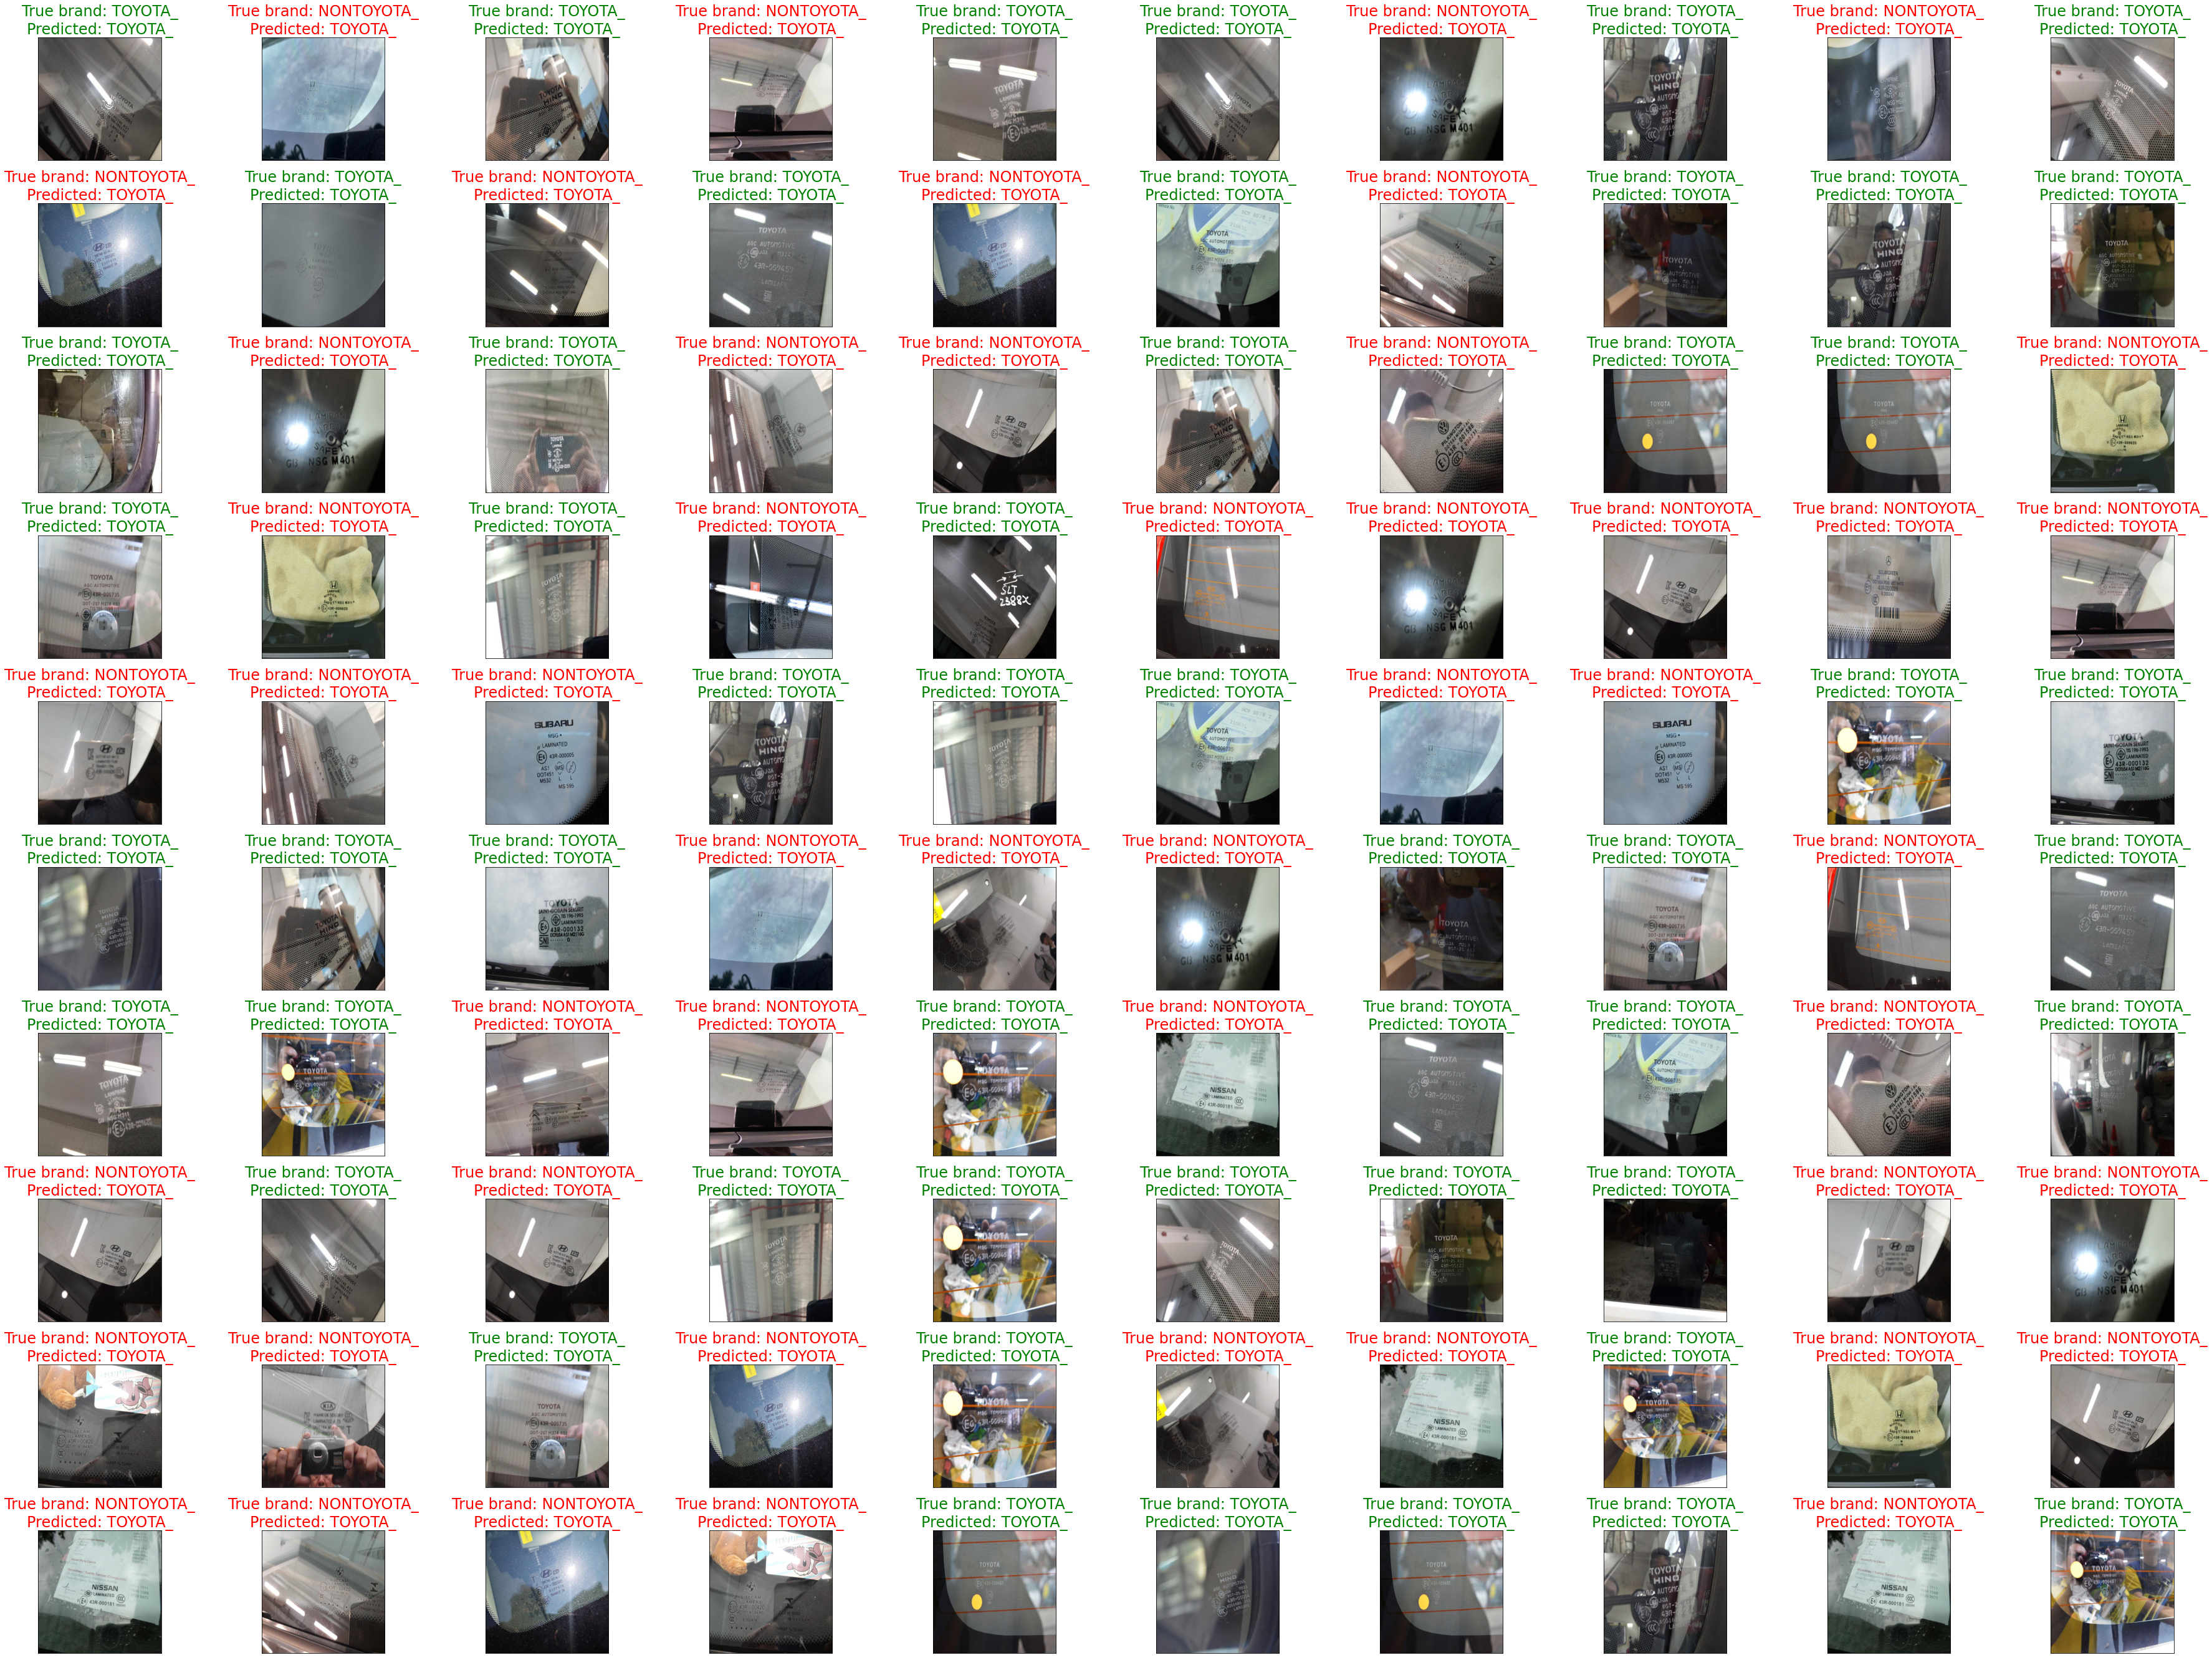

In [59]:

# That is strictly for the showcasing, how the CNN works - ain't that bad, after all :)
ShowCase(10, 10)

In [ ]:
print(os.listdir())

['.config', 'model_car_ResNet_AUGM.json', '.ipynb_checkpoints', 'images', 'actual_data.zip', 'car_ResNet_AUGM.h5py', 'new_images.zip', 'car_CNN_9AUGM_CMCMCMCMF.h5py.zip', 'car_CNN_AUGM_CMCMCMCMF.h5', 'actual_data', 'car_ResNet_AUGM_weights.h5', 'images.zip', 'car_CNN_9AUGM_CMCMCMCMF.h5py', 'new_images', 'sample_data']


**Predict new images **

In [60]:
new_image_path = './ImagesToyotaNonToyotaTest4/'
new_imgs = os.listdir(new_image_path)
new_n_samples = np.size(new_imgs)
new_n_samples # 8

4

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


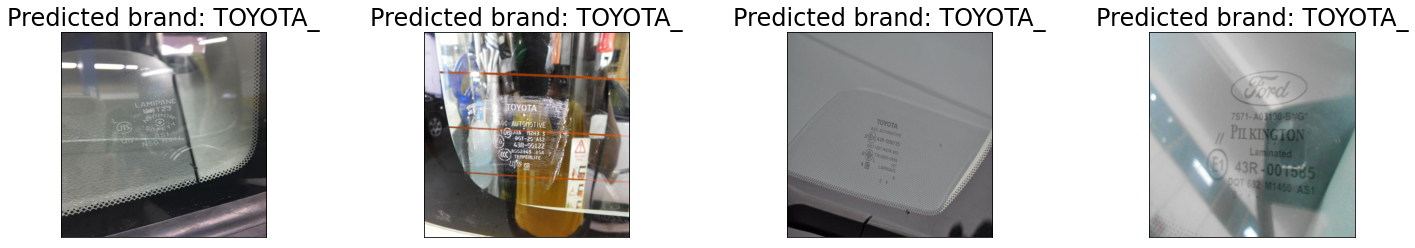

In [61]:
cols = 6
rows = 4
plt.figure(figsize=(cols * 5, rows * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(new_n_samples):
    plt.subplot(rows, cols, i + 1)
    im = Image.open(new_image_path+new_imgs[i]).convert("RGB")
    new_im = np.array(im.resize((480,480))).flatten()
    m = int(model.predict_classes(ImageConvert(1, new_im), verbose=0))
    plt.imshow(new_im.reshape(img_x, img_y, 3))
    plt.title('Predicted brand: '+cars[m], size=24)
    plt.xticks(())
    plt.yticks(())
plt.show() 

In [55]:
new_image_path = './ImagesTest/'
new_imgs = os.listdir(new_image_path)
new_n_samples = np.size(new_imgs)
new_n_samples # 8

5

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


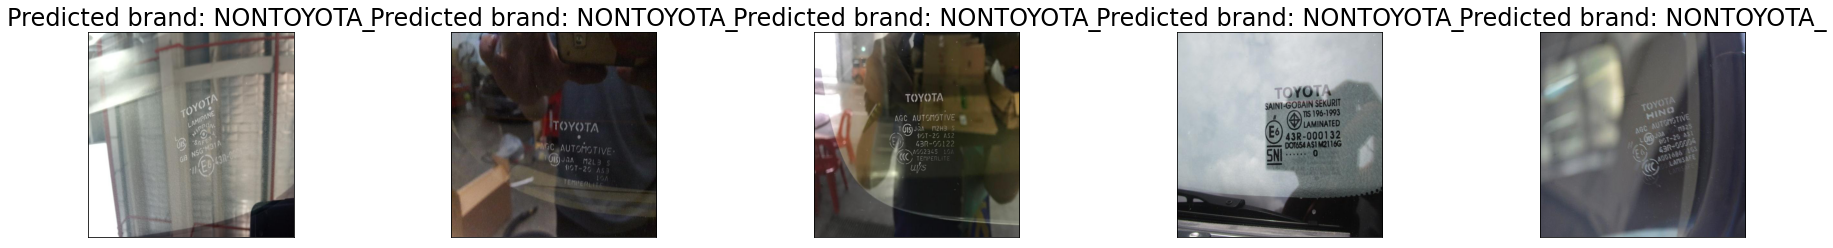

In [57]:
cols = 6
rows = 4
plt.figure(figsize=(cols * 5, rows * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(new_n_samples):
    plt.subplot(rows, cols, i + 1)
    im = Image.open(new_image_path+new_imgs[i]).convert("RGB")
    new_im = np.array(im.resize((500,500))).flatten()
    m = int(model.predict_classes(ImageConvert(1, new_im), verbose=0))
    plt.imshow(new_im.reshape(img_x, img_y, 3))
    plt.title('Predicted brand: '+cars[m], size=24)
    plt.xticks(())
    plt.yticks(())
plt.show() 